# NextGEMS data

```{note}
The online laboratory has only been tested in recent Firefox and Chrome browsers. Some features may not (yet) be supported in Safari browsers.
```

```{caution}
In the online laboratory, changes to notebooks and local files are only saved in your web browser's storage and not persisted to disk.

Please download copies of any files that you don't want to loose.

Your files from an old session will usually be kept if you close or refresh this page, unless your browser's storage for `lab.climet.eu` is cleared, e.g.
- manually by clearing the browser's site data
- automatically when too much data is stored
- automatically when you close a private browsing context
- if you have setup your browser to clear site data, e.g. when the browser is closed
```

This notebook is a comprehensive guide to accessing a Zarr dataset for an ICON simulation within the 4th model cycle phase of the NextGEMS project. It includes details about the available parameters and steps, along with instructions for using the `load_NextGEMS_data` function to access these data from the [ECMWF S3 bucket](https://object-store.os-api.cci1.ecmwf.int/esiwacebucket/EW3_ICON_ngc4008_90d_Compression_test.zarr/). The Zarr data are not downloaded locally; instead, it is accessed remotely using `zarr`.

---

## Experiment Details and Available Data Fields

The dataset comprises output data from an ICON run within the 4th model cycle phase of the NextGEMS project (NGC4008). This simulation spans a total of 30 years and uses an ssp370-like scenario run from 2020.
The simulation was performed using a horizontal grid spacing of approximately 100 km (R2B8/8). 
A global, coupled simulation covering a time period of 1000 years, starting in 1300, was run. 48-hourly output data were generated throughout the simulation.
However, only a subset of the data is provided: three months of data for four selected variables at three model levels.
The data are stored on a HEALPix grid with lossless compression, and the total size of the available dataset is approximately 9 GB.

The dataset is contained in a Zarr directory. The data are available for reuse under the Creative Commons Attribution 4.0 International (CC BY 4.0) license: <https://creativecommons.org/licenses/by/4.0/>.

The following 2D parameters are available:
```python
["hus", "pr", "ua", "va"]
```
The following model levels are available:
```python
[89, 65, 55]
```


The available time steps begin at 2020-01-02 00:00:00 UTC, increasing in 2-day steps until 2020-03-31 00:00:00 UTC.



## Using the `load_NextGEMS_data` Function

To load the Zarr directory, you can use the following function:

```python
load_NextGEMS_data()
```

This function is straightforward and does not require any parameters.


In [1]:
# URL of S3 bucket
BASE_URL = "https://object-store.os-api.cci1.ecmwf.int/esiwacebucket"

First, the package `zarr` (modern dataset format that is specifically designed for chunked access) and its dependencies need to be imported for the remote access.

In [2]:
import aiohttp
import dask
import fsspec
import zarr

[pyodide]: Loading Jinja2, MarkupSafe, aiohappyeyeballs, aiohttp, aiosignal, asciitree, async-timeout, attrs, click, cloudpickle, dask, frozenlist, fsspec, importlib_metadata, locket, msgpack, multidict, numcodecs, numpy, partd, propcache, pyyaml, toolz, yarl, zarr, zipp
[pyodide]: Loaded Jinja2, MarkupSafe, aiohappyeyeballs, aiohttp, aiosignal, asciitree, async-timeout, attrs, click, cloudpickle, dask, frozenlist, fsspec, importlib_metadata, locket, msgpack, multidict, numcodecs, numpy, partd, propcache, pyyaml, toolz, yarl, zarr, zipp
[pyodide]: Memory usage has grown to 71.9MiB (from 49.9MiB) for this notebook


The `load_NextGEMS_data` function simplifies remote access to Zarr datasets stored on the S3 bucket. It loads the data efficiently as an xarray dataset.


In [3]:
import json

import requests
import xarray as xr


def load_NextGEMS_data():
    url = f"{BASE_URL}/EW3_ICON_ngc4008_90d_Compression_test.zarr"

    print(f"Loading dataset {url}")

    return xr.open_dataset(url, engine="zarr", chunks=dict())

[pyodide]: Loading pandas, pyarrow, pyodide-unix-timezones, python-dateutil, pytz, tzdata, xarray
[pyodide]: Loaded pandas, pyarrow, pyodide-unix-timezones, python-dateutil, pytz, tzdata, xarray
[pyodide]: Memory usage has grown to 149.1MiB (from 71.9MiB) for this notebook


## Example Usage

To load the Zarr directory, you can use the following example. This will load the whole dataset. 

In [4]:
ds = load_NextGEMS_data()
ds

Loading dataset https://object-store.os-api.cci1.ecmwf.int/esiwacebucket/EW3_ICON_ngc4008_90d_Compression_test.zarr


<xarray.Dataset> Size: 11GB
Dimensions:     (time: 90, level_full: 3, cell: 3145728)
Coordinates:
  * level_full  (level_full) float64 24B 89.0 65.0 55.0
  * time        (time) datetime64[ns] 720B 2020-01-02 2020-01-03 ... 2020-03-31
Dimensions without coordinates: cell
Data variables:
    hus         (time, level_full, cell) float32 3GB dask.array<chunksize=(3, 1, 196608), meta=np.ndarray>
    pr          (time, cell) float32 1GB dask.array<chunksize=(3, 196608), meta=np.ndarray>
    ua          (time, level_full, cell) float32 3GB dask.array<chunksize=(3, 1, 196608), meta=np.ndarray>
    va          (time, level_full, cell) float32 3GB dask.array<chunksize=(3, 1, 196608), meta=np.ndarray>

Since the `earthkit.plots` package does not yet support plotting `xarray` data stored on a HEALPix grid, we use the `pyicon` library here instead.

In [5]:
import pyicon as pyic

[pyodide]: Loading Cartopy, Pillow, astropy, astropy_iers_data, cftime, cmocean, cycler, fonttools, geos, h5py, healpy, ipywidgets, jupyterlab_widgets, kiwisolver, matplotlib, matplotlib-pyodide, netcdf4, openblas, pkgconfig, pyerfa, pyicon-diagnostics, pyparsing, pyproj, pyshp, scipy, shapely, widgetsnbextension
[pyodide]: Loaded Cartopy, Pillow, astropy, astropy_iers_data, cftime, cmocean, cycler, fonttools, geos, h5py, healpy, ipywidgets, jupyterlab_widgets, kiwisolver, matplotlib, matplotlib-pyodide, netcdf4, openblas, pkgconfig, pyerfa, pyicon-diagnostics, pyparsing, pyproj, pyshp, scipy, shapely, widgetsnbextension
----Start loading pyicon.
----Start loading pyicon.
----Pyicon was loaded successfully.
----Pyicon was loaded successfully.
[pyodide]: Memory usage has grown to 257.8MiB (from 149.1MiB) for this notebook


The data can be visualized as demonstrated below. For example, the specific humidity on **2020-02-01 at 00:00:00 UTC** at model level 89 is plotted.


[pyodide]: Memory usage has grown to 445.5MiB (from 257.8MiB) for this notebook


/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


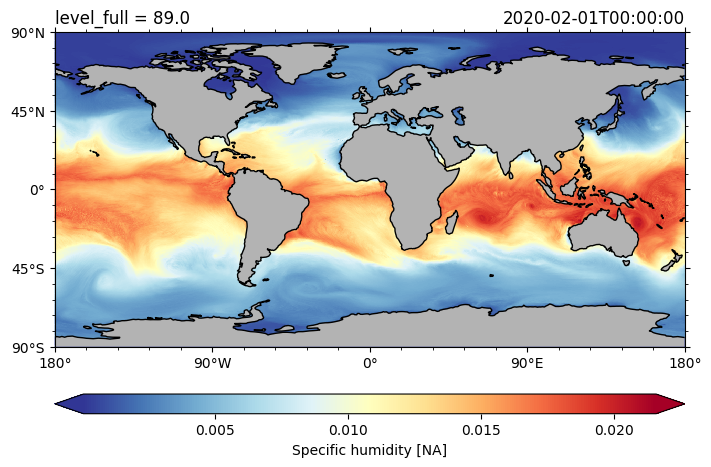

In [6]:
da_hus = ds.hus.sel(time="2020-02-01T00:00:00", level_full=89.0)
da_hus.pyic.plot();

Zonal and Meridional wind can be visualized in the same way.


The precipitation flux on **2020-03-31 at 00:00:00 UTC** is plotted as demonstrated below.


[pyodide]: Memory usage has grown to 534.6MiB (from 445.5MiB) for this notebook


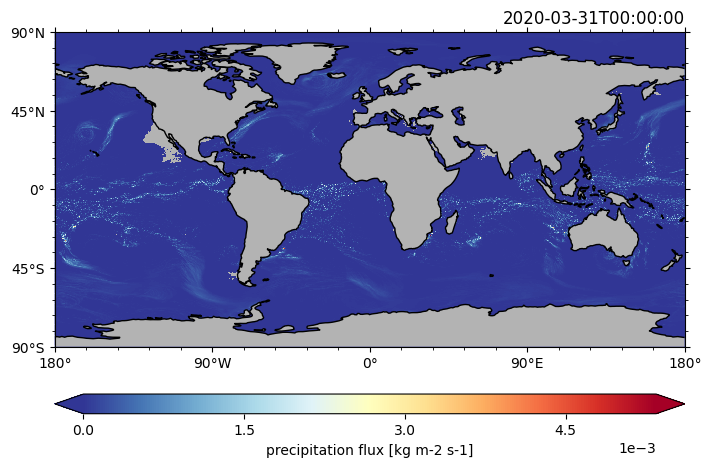

In [7]:
da_pr = ds.pr.sel(time="2020-03-31T00:00:00")
da_pr.pyic.plot();